<a href="https://colab.research.google.com/github/aditya8075/CUSTOMER-SEGMENTATION---CLUSTURING-CAPSTON-PROJECT/blob/main/Customer_segmentation_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction


In a world where businesses are growing tremendously, and cater to a large number of customers on a regular basis. It becomes very essential for businesses to categorize their customers, this would not only lead to better customer service but also would help businesses understand how different customers can impact their business. This project, aims to classify customers into different categories and understand thier impact on the business.
## Problem Description
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
## Data Description
Attribute Information:
### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
### Description: Product (item) name. Nominal.
### Quantity: The quantities of each product (item) per transaction. Numeric.
### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
### Country: Country name. Nominal, the name of the country where each customer resides.


## Importing the data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading and reading dataset
data=pd.read_csv('/content/drive/MyDrive/customer segmentation csv.csv',encoding= 'unicode_escape')

In [ ]:
#first 5 records of the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#last 5 records of the data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Statistical description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 1.DATA CLEANING

In this step, the main focus will be to handle the null values and other errors in the data. Columns that are not required will also be dropped.

In [ ]:
#number of rows and columns in data
data.shape

(541909, 8)

The data contains 541909 records and 8 featurs/columns.

In [ ]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Number of unique products in the dataset
data['Description'].nunique()

4223

There are 1454 null values in the description column. There are 4223 different products in the dataset. It is not possible to fill the null values in a strategical manner. Hence, we will drop the null values of the description column.

In [ ]:
# Dropping the null values of the description column
data.dropna(subset = ['Description'], inplace = True)

Null values of the Customer ID column

In [ ]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

Unique cumstomer ID

In [ ]:
# Number of unique Customer IDs
data['CustomerID'].nunique()

4372

There are 4372 unique customers in the dataset, there are also 133626 null values in the column. There is no particular method to fill these huge number of points. We cannot use median, mean or mode to fill these values. It is close to impossible that one customer ID can fill 133626 rows. Hence, we will drop the rows containing null values.

In [ ]:
# Dropping the rows which contain null values in the Customer ID column
data.dropna(subset=['CustomerID'], axis = 0, inplace = True)

Dropping all null valus presents in data set in that procedure we have lost most of the data .
Observing records present after dropping null values

In [ ]:
# Re-checking null values after removal
print(data.isna().sum())
print(f'The shape of the data is {data.shape}')

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
The shape of the data is (406829, 8)


# Before handling null values data contains 541909 but after dropping null values present in 2 columns which are description and customer id now data contains 406829 records.
# Unfortunately 135080 Records have been lost in the process.

## As customer ID is a 5 digit number, we can convert it from a float type to an integer type

In [ ]:
# Converting Customer ID column from float type to int type
data['CustomerID'] = data['CustomerID'].apply(int)

It is known that some of the orders have been cancelled, the invoice numbers of these orders start with a 'C'. The cancelled orders are also removed.

In [ ]:
# Converting the column to a string type to detect 'C'
data['InvoiceNo'] = data['InvoiceNo'].apply(str)

In [ ]:
# Creating a function to detect cancelled orders
def cancelled_order(rows):
  '''Detects cancelled orders and returns YES or NO accordingly'''
  if 'C' in rows:
    return 'YES'
  else:
    return 'NO'

In [ ]:
# Applying the above function and creating a new column to display cancelled orders
data['Cancelled'] = data['InvoiceNo'].apply(cancelled_order)

In [ ]:
# Dropping the cancelled orders
data.drop(data[data['Cancelled'] == 'YES'].index, inplace=True)

In [ ]:
# Dropping the cancelled column
data.drop('Cancelled', axis = 1, inplace = True)

In [ ]:
data.shape

(397924, 8)

The cancelled records has been removed unfortunately 8905 records have been lost in this process.

In [ ]:
# Converting the Invoice no column back to a numerical type
data['InvoiceNo'] = data['InvoiceNo'].apply(int)

## FEATURE ENGINEERING

# Extraction some fetures from Invoice date column such as day , month , year ,day_name ,Quarter ,Hour and week these column would be very important to generate some meaningfull insights from the data.

In [ ]:
# Using the Invoice date column to extract 
data['InvoiceDate']=data['InvoiceDate'].apply(pd.to_datetime)
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['day_name'] = data['InvoiceDate'].dt.day_name()
data['Quarter']=data['InvoiceDate'].dt.quarter
data['hour']=data['InvoiceDate'].dt.hour
data['week'] = data['InvoiceDate'].dt.week





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


# First 5 records after applying feature extraction

In [ ]:
#head of dataset after feature extraction
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,day_name,Quarter,hour,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2


In [ ]:
# Brief Description of the data
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year,Quarter,hour,week
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.709711,6.945007,2010.934259,2.656796,12.728247,28.289859
std,13106.167695,180.420210,22.096788,1713.169877,8.041305,3.329803,0.247829,1.107172,2.273535,14.596201
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000,1.000000,6.000000,1.000000
25%,549234.000000,2.000000,1.250000,13969.000000,10.000000,4.000000,2011.000000,2.000000,11.000000,16.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,7.000000,2011.000000,3.000000,13.000000,29.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,10.000000,2011.000000,4.000000,14.000000,42.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000,4.000000,20.000000,52.000000


## Exploratory Data Analysis

# In these section form a meaningfull insights with the help of data visualization

## OUTLIER DETECTION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


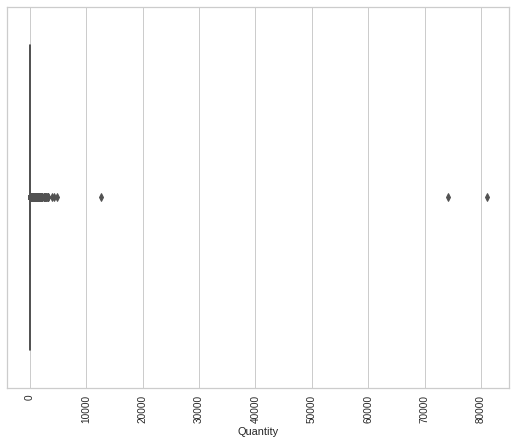

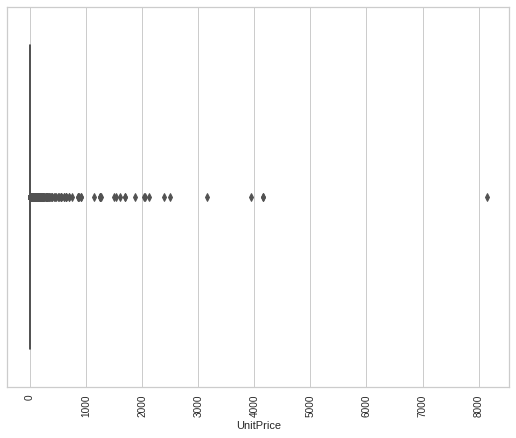

In [ ]:
#creating function for visualizing outliers by boxplot
def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.boxplot(data[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)

In [ ]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]   
  
  return df

In [ ]:
# Removing the outliers using the function created
data = remove_outliers(df = data, column = 'Quantity')
data = remove_outliers(df = data, column = 'UnitPrice')

Extracting Total Amount Column by multipling Quantity and Unit price

In [ ]:
#Exatract total amount spend my customer column by multiplying quantity and unitprice
data['TotalAmount']=data['Quantity']*data['UnitPrice']

## Top 10 most repeatedly sold items

In [ ]:
# Top 10 most repeatedly sold items
data['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1680
JUMBO BAG RED RETROSPOT               1329
PARTY BUNTING                         1275
LUNCH BAG RED RETROSPOT               1207
ASSORTED COLOUR BIRD ORNAMENT         1159
SET OF 3 CAKE TINS PANTRY DESIGN      1120
LUNCH BAG  BLACK SKULL.               1048
SPOTTY BUNTING                         976
LUNCH BAG SPACEBOY DESIGN              971
PACK OF 72 RETROSPOT CAKE CASES        963
Name: Description, dtype: int64

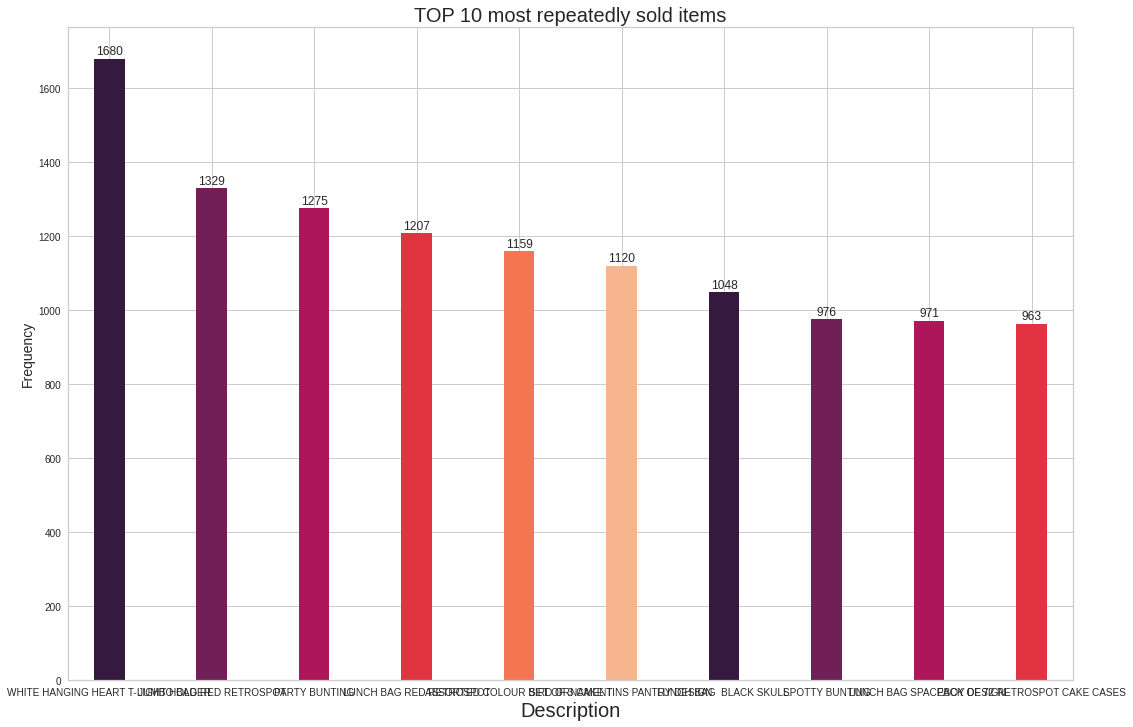

In [ ]:
#barplot for agents and their bookings
Description = data['Description'].value_counts().head(10)
plt.figure(figsize=(18,12))
ax = Description.plot(kind = 'bar', rot=0, color=sns.color_palette('rocket'), width=0.3)
ax.set_title('TOP 10 most repeatedly sold items', y=1, fontsize=20)
ax.set_xlabel('Description',fontsize=20)
ax.set_ylabel('Frequency', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the barplot of top 10 most frequently sold items it is clearly seen that WHITE HANGING HEART T-LIGHT HOLDER is the most reapetedly sold items.
Hence company should generate stratergies to increase the suppy of all those 10 most frequently sold items.

## Top 10 items which have generated highest revenue

In [ ]:
most_revenue_generated_product=data.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
most_revenue_generated_product

Description
PARTY BUNTING                         35011.95
WHITE HANGING HEART T-LIGHT HOLDER    31819.81
JUMBO BAG RED RETROSPOT               24929.74
SPOTTY BUNTING                        23542.75
ASSORTED COLOUR BIRD ORNAMENT         23107.37
JAM MAKING SET WITH JARS              21184.00
HOT WATER BOTTLE KEEP CALM            20741.10
SET OF 3 CAKE TINS PANTRY DESIGN      20633.47
CHOCOLATE HOT WATER BOTTLE            18462.45
CHILLI LIGHTS                         18401.20
Name: TotalAmount, dtype: float64

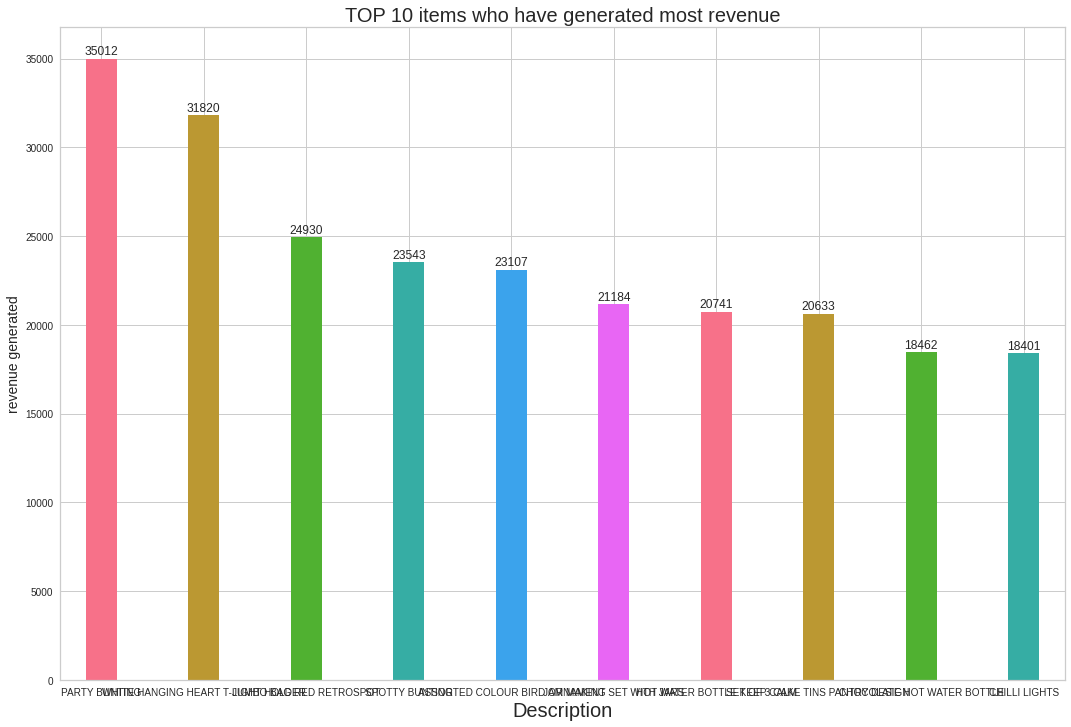

In [ ]:
#barplot for agents and their bookings
most_revenue_generated_product=data.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,12))
ax = most_revenue_generated_product.plot(kind = 'bar', rot=0, color=sns.color_palette('husl'), width=0.3)
ax.set_title('TOP 10 items who have generated most revenue', y=1, fontsize=20)
ax.set_xlabel('Description',fontsize=20)
ax.set_ylabel('revenue generated', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the barplot of Top 10 most revenue generated items we can clearly seen the PAPER CRAFT , LITTLE BIRDIE is the item which have generated most revenue for company.


Hence company needs to work on that product and improve quality and supply further more to generate more revenue.


But one important point in that the products called REGENCY CAKESTAND 3 TIER , WHITE HANGING HEART T-LIGHT HOLDER , JUMBO BAG RED RETROSPOT these are the top 3 products who sold more frequently and also comes under the top 5 product who generated most revenue for company soo compnany need to maintain good suppy and improve quality of product soo the company make more profit by selling those 3 products because these 3 products are most important products for the company.


## Top 10 most frequent customers

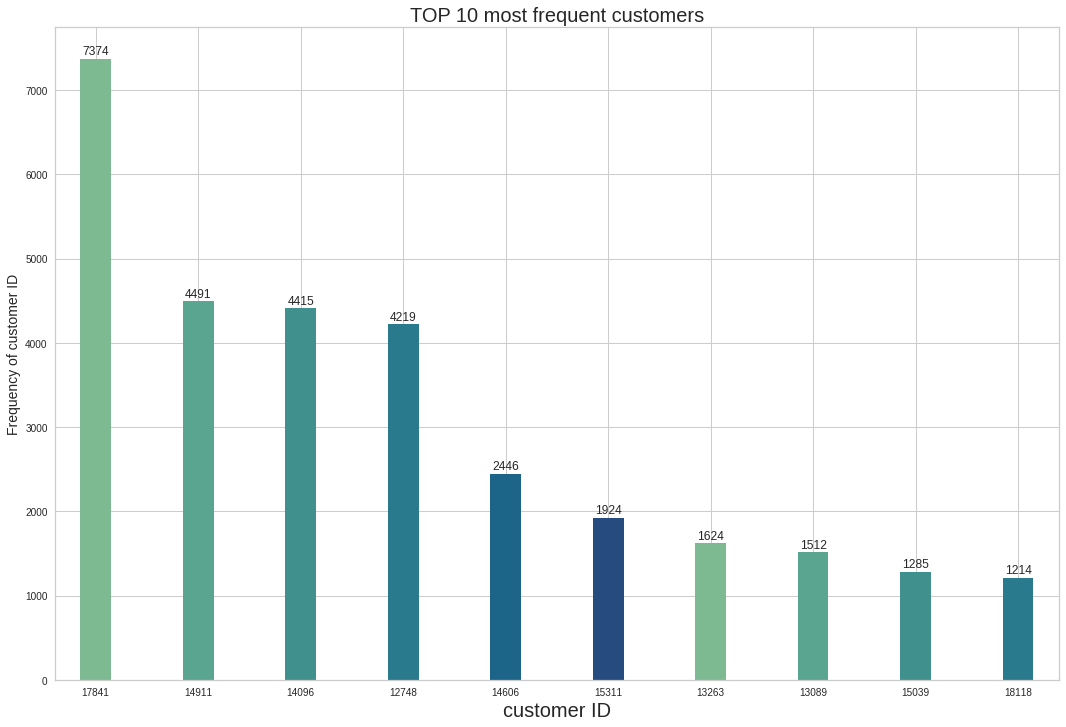

In [ ]:
#barplot for visulizing customers wgo are most frequent
CustomerID = data['CustomerID'].value_counts().head(10)
plt.figure(figsize=(18,12))
ax = CustomerID.plot(kind = 'bar', rot=0, color=sns.color_palette('crest'), width=0.3)
ax.set_title('TOP 10 most frequent customers', y=1, fontsize=20)_
ax.set_xlabel('customer ID',fontsize=20)
ax.set_ylabel('Frequency of customer ID', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the above barplot we can clearly seen that top 10 most frequent customer hence company need to maintain good relationship with that customers.

##Top 10 customer on who has spent maximum amount

In [ ]:
most_revenue_making_customer=data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
most_revenue_making_customer.to_frame()

,TotalAmount
CustomerID,
14911,85018.78
13089,36411.63
14096,36019.84
17841,32644.72
14298,24387.53
12748,21046.63
14156,18300.66
13081,17925.53
15311,17756.31


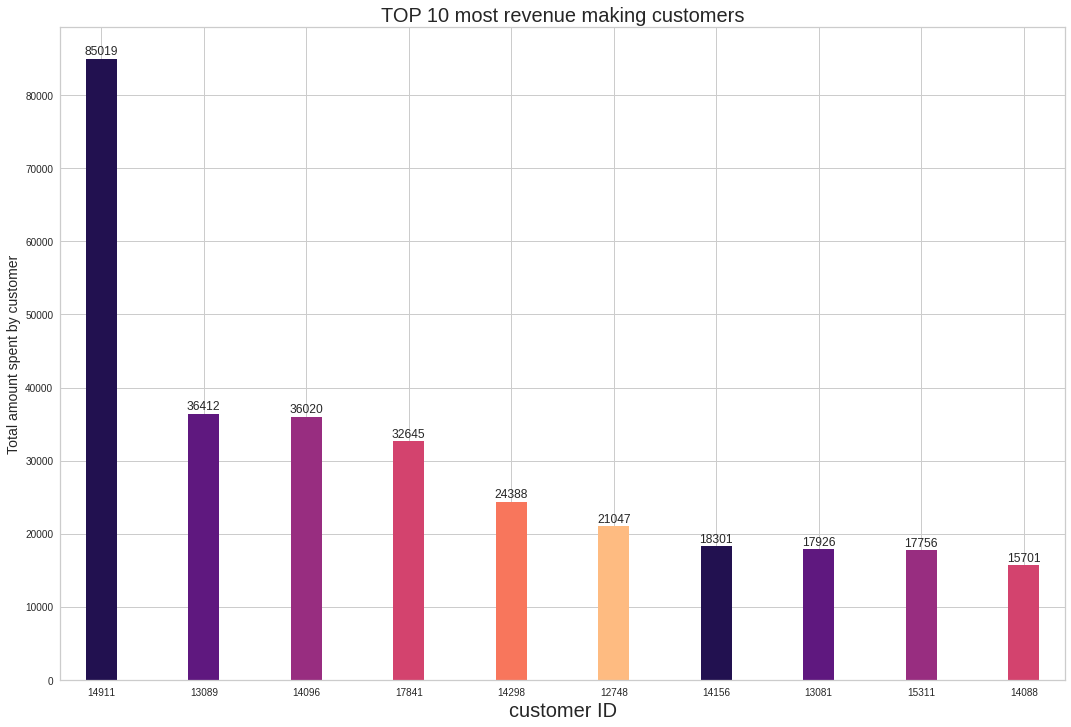

In [ ]:
#barplot for visulizing customers wgo are most frequent
most_revenue_making_customer=data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,12))
ax = most_revenue_making_customer.plot(kind = 'bar', rot=0, color=sns.color_palette('magma'), width=0.3)
ax.set_title('TOP 10 most revenue making customers', y=1, fontsize=20)
ax.set_xlabel('customer ID',fontsize=20)
ax.set_ylabel('Total amount spent by customer', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the above bar plot these are the customers who has bought more products also boughts in a mass valume soo those customers are likely to be wholesellers or distributors.

Because that compant should provide more discounts to those customers also provide grete deals in order to make more profit from that customers.

## Countries that were sold different items the most

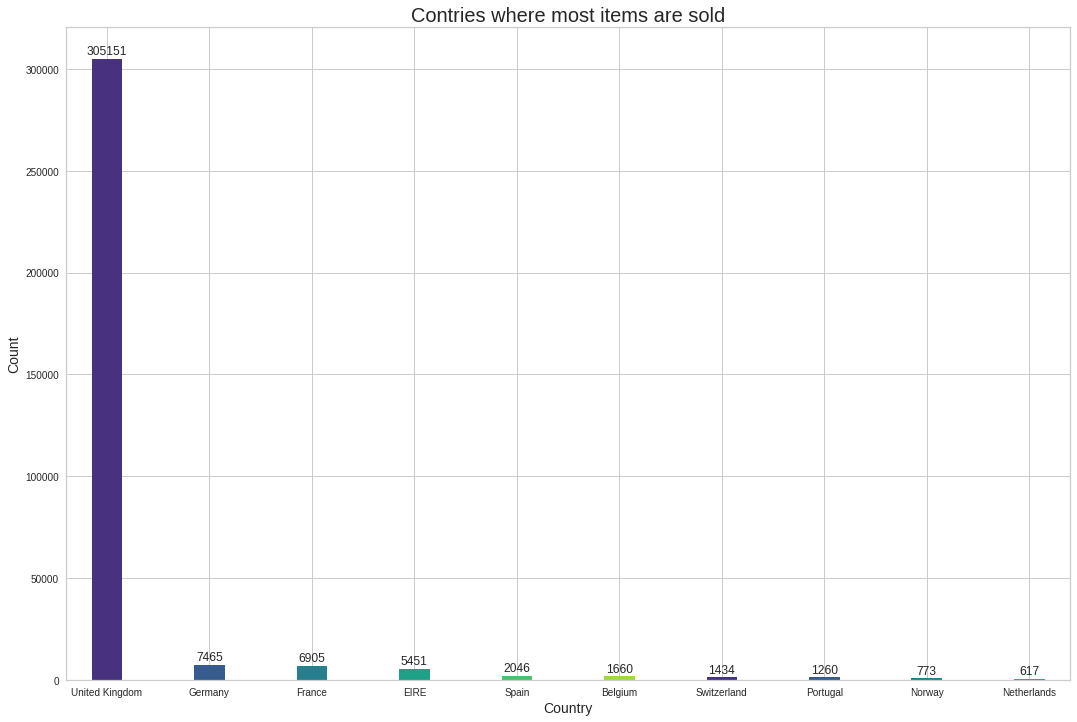

In [ ]:
#barplot for Contries where most items are sold
Country = data['Country'].value_counts().head(10)
plt.figure(figsize=(18,12))
ax = Country.plot(kind = 'bar', rot=0, color=sns.color_palette('viridis'), width=0.3)
ax.set_title('Contries where most items are sold', y=1, fontsize=20)
ax.set_xlabel('Country',fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the above bar plot we can clealy seen that most of the itema has been sold in united kingdom.

Because of that company need to perform marketing campaign in united kingdom in order to expand there business in that company.

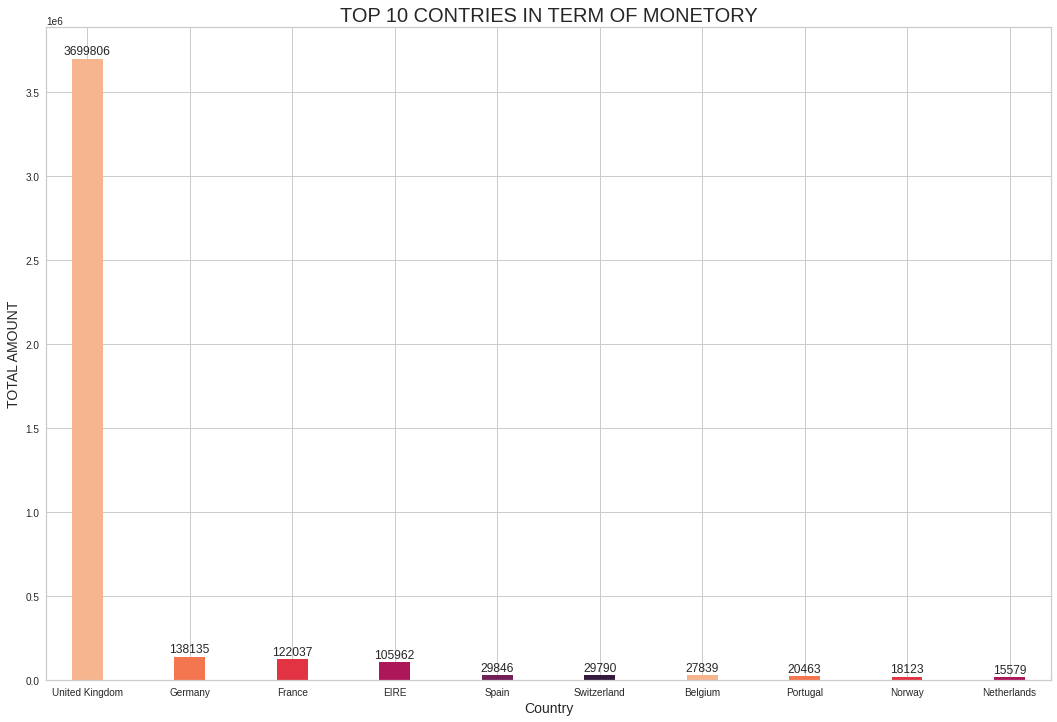

In [ ]:
#top 10 most revenue generated countries
high_sales_countries=data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,12))
ax = high_sales_countries.plot(kind = 'bar', rot=0, color=sns.color_palette('rocket_r'), width=0.3)
ax.set_title('TOP 10 CONTRIES IN TERM OF MONETORY', y=1, fontsize=20)
ax.set_xlabel('Country',fontsize=14)
ax.set_ylabel('TOTAL AMOUNT', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the above bar plot we clearly seen that united kingdom generated most revenue for company than other contries.

In [ ]:
data['Year'].value_counts()

2011    316037
2010     22145
Name: Year, dtype: int64

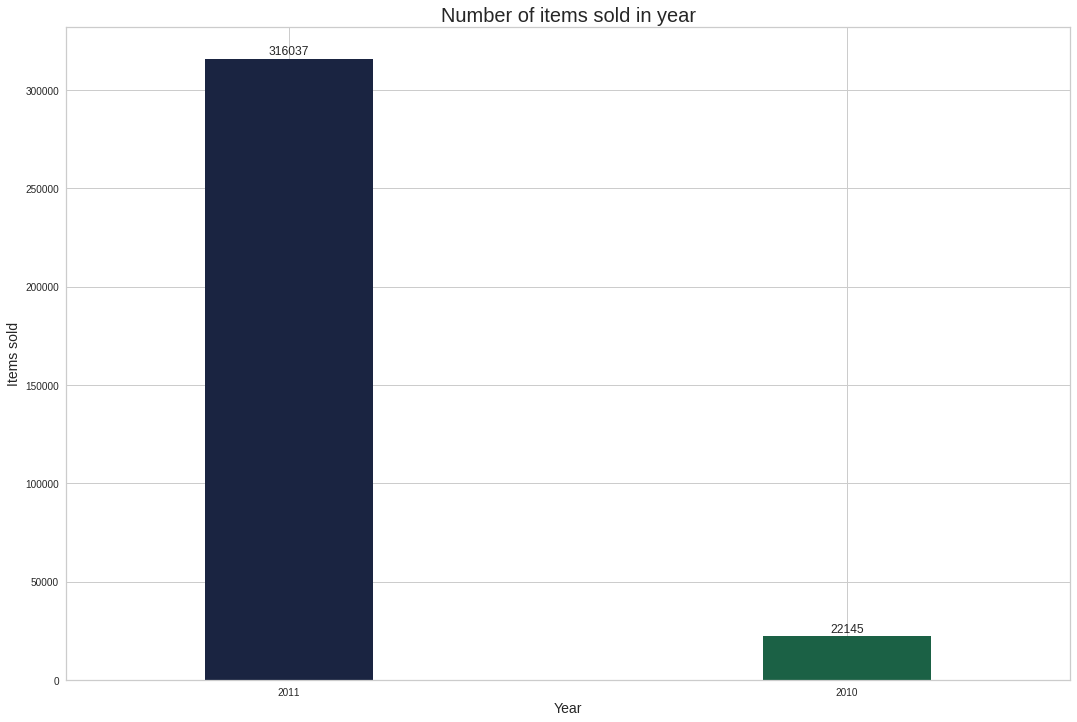

In [ ]:
#barplot for year count
year = data['Year'].value_counts()
plt.figure(figsize=(18,12))
ax = year.plot(kind = 'bar', rot=0, color=sns.color_palette('cubehelix'), width=0.3)
ax.set_title('Number of items sold in year', y=1, fontsize=20)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Items sold', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the above bar plot we can see that most items has been sold in the 2011.

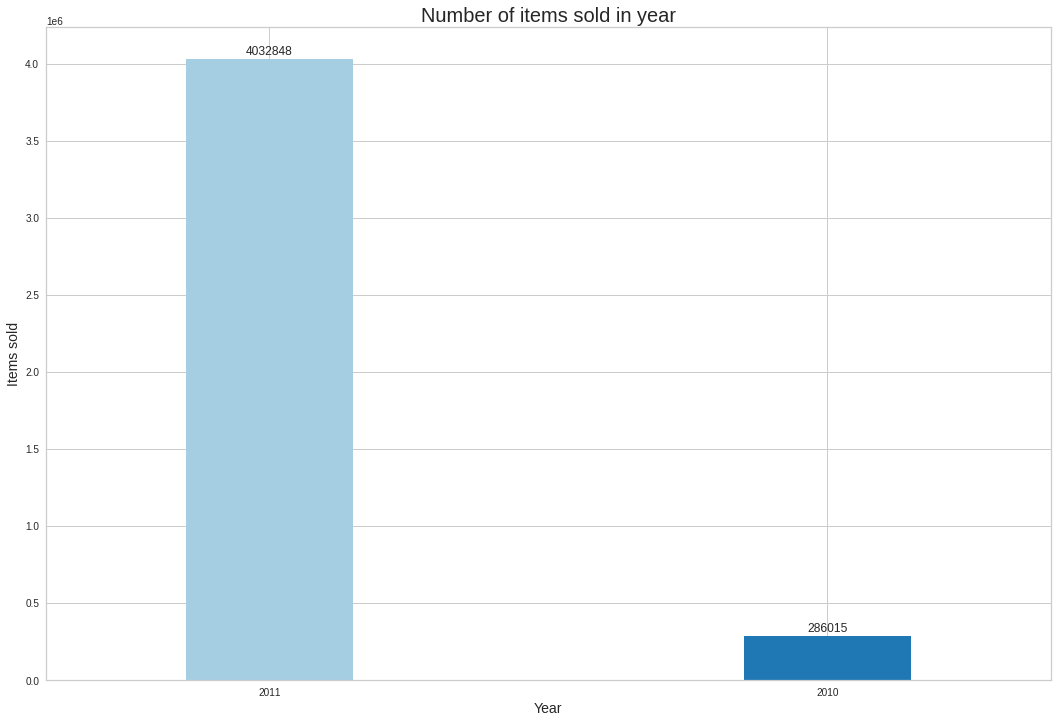

In [ ]:
#barplot for year count
year_total_amount=data.groupby('Year')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(18,12))
ax = year_total_amount.plot(kind = 'bar', rot=0, color=sns.color_palette('Paired'), width=0.3)
ax.set_title('Number of items sold in year', y=1, fontsize=20)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Items sold', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the above bar plot we can clearly seen that the most revenue generate by the company is 8338694 in the year of 2011.

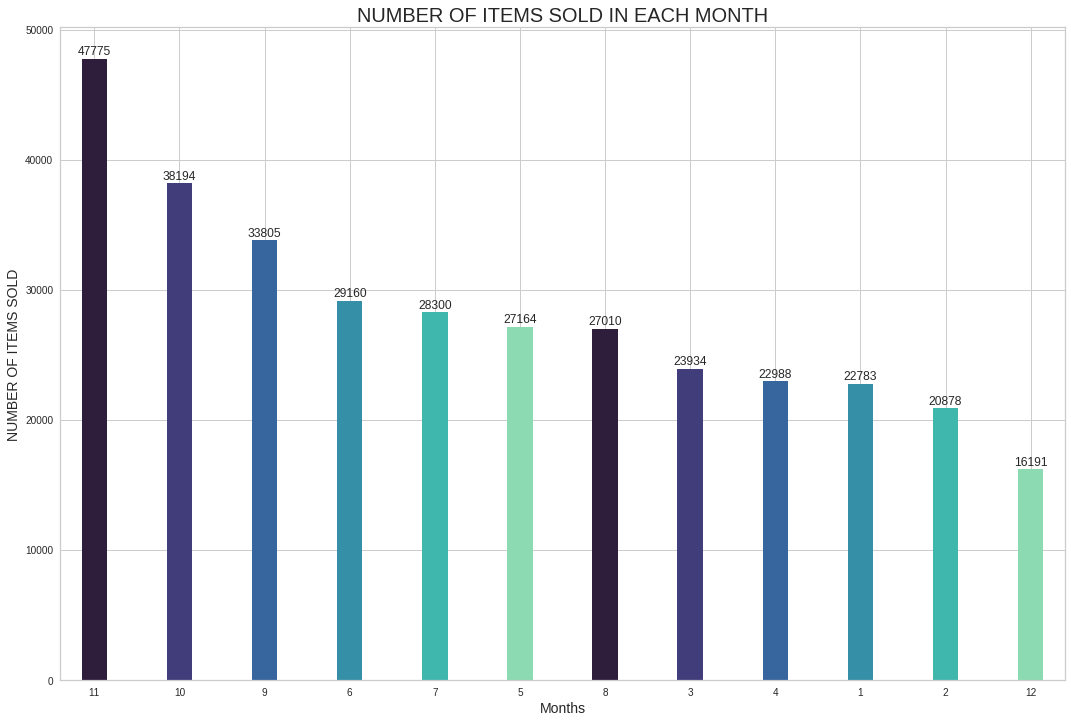

In [ ]:
#most number of items sold in each month
Months = data['Month'].value_counts()
plt.figure(figsize=(18,12))
ax = Months.plot(kind = 'bar', rot=0, color=sns.color_palette('mako'), width=0.3)
ax.set_title('NUMBER OF ITEMS SOLD IN EACH MONTH', y=1, fontsize=20)
ax.set_xlabel('Months',fontsize=14)
ax.set_ylabel('NUMBER OF ITEMS SOLD', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

from the above bar plot we can clearly seen that in the month of seprtember,octomber and november  most number of fromduct has been sold .

Hence company needs to provide more discounts and offers on there product to generate more revenue in that months.

Now in the months of december,january and february least items are sold therefore company needs to develop strategies and plan to seel more product in  that months.

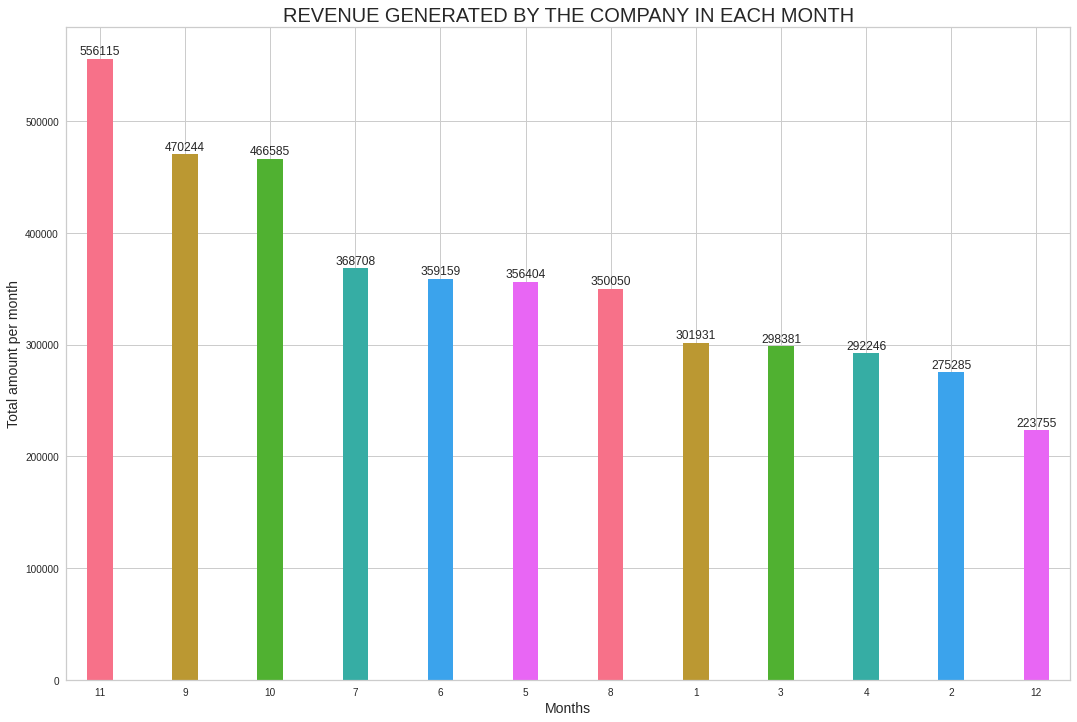

In [ ]:
#Revenue generated by the company in each month
high_sales_month=data.groupby('Month')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,12))
ax = high_sales_month.plot(kind = 'bar', rot=0, color=sns.color_palette('husl'), width=0.3)
ax.set_title('REVENUE GENERATED BY THE COMPANY IN EACH MONTH', y=1, fontsize=20)
ax.set_xlabel('Months',fontsize=14)
ax.set_ylabel('Total amount per month', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the barplot we can clearly seen that in the month of novermber ,september and octomeber company made more revenue than other month.

There is a possibility that in those three months more number of special events and feativals are occured beacause of that most number of product are bought by the customer and revenue made by the company is at the most.

In the month of january customer had not bought items frequently but in this bar plot company generate better revenue in these month this could be done because customer bought very expensive items in january month.

In [ ]:
#creating a function to categorise hours in three slots
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
#creating new column which provides hour slots into three categories
data['Time_type']=data['hour'].apply(time_type)


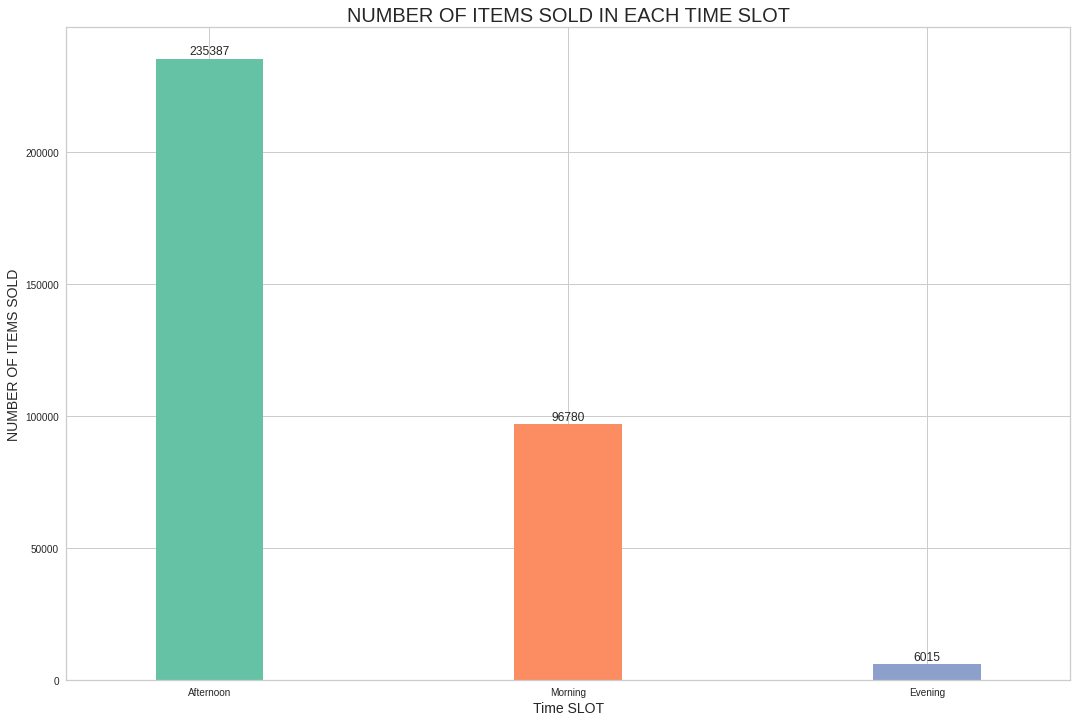

In [ ]:
#barplot number of item sold in each time slot
TypeType = data['Time_type'].value_counts()
plt.figure(figsize=(18,12))
ax = TypeType.plot(kind = 'bar', rot=0, color=sns.color_palette('Set2'), width=0.3)
ax.set_title('NUMBER OF ITEMS SOLD IN EACH TIME SLOT', y=1, fontsize=20)
ax.set_xlabel('Time SLOT',fontsize=14)
ax.set_ylabel('NUMBER OF ITEMS SOLD', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

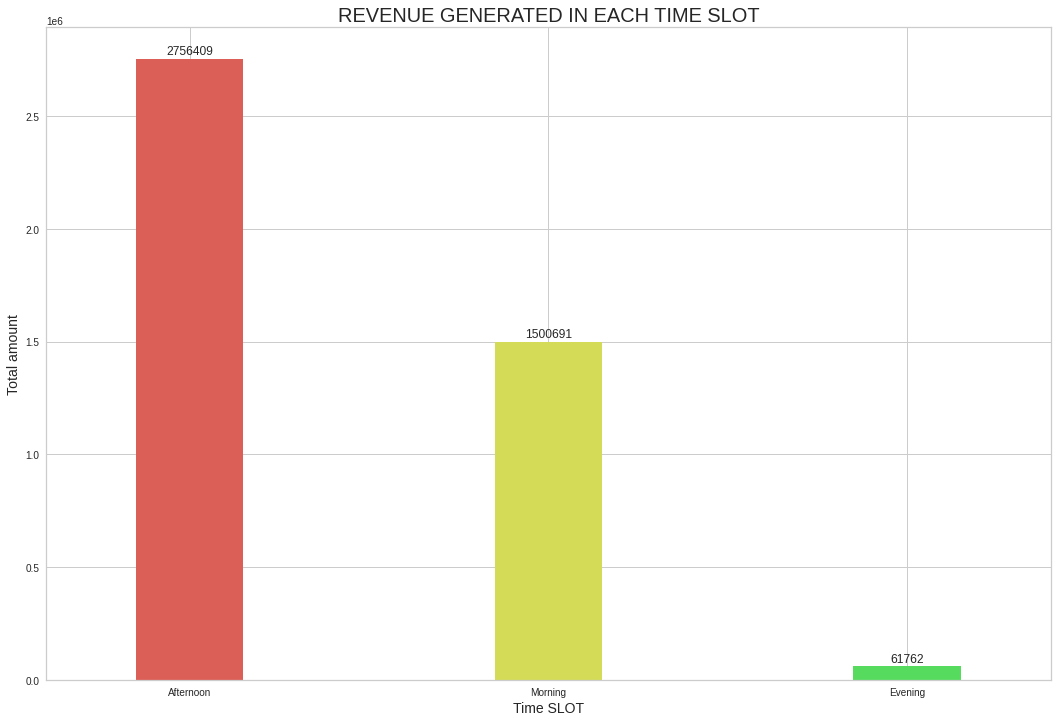

In [ ]:
#revenue generated in each time slot
high_sales_time_slots=data.groupby('Time_type')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,12))
ax = high_sales_time_slots.plot(kind = 'bar', rot=0, color=sns.color_palette('hls'), width=0.3)
ax.set_title('REVENUE GENERATED IN EACH TIME SLOT', y=1, fontsize=20)
ax.set_xlabel('Time SLOT',fontsize=14)
ax.set_ylabel('Total amount', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()



1. from the above bar plot we can clearly seen that in the  'Afternoon' time slot most number of customer like to bought items because of the in this time slot most number of iteams has been sold and company able to generate most of the revenue in that time slot.

2. hence for that company needs to provide more man power in that time slot to sell items  to there customers and provide customer satisfaction also provide some gift vouchers to the customer who bought there products in this time slot to gnerate more revenue in that time slot.

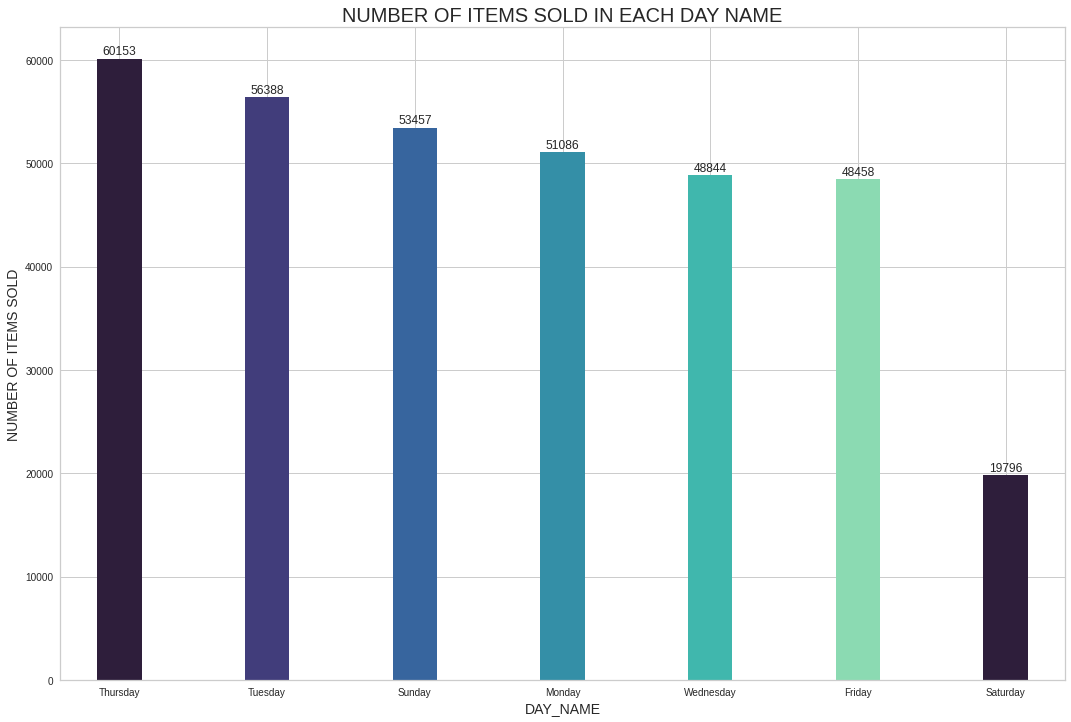

In [ ]:
#barplot number of item sold in each day name 
day_name = data['day_name'].value_counts()
plt.figure(figsize=(18,12))
ax = day_name.plot(kind = 'bar', rot=0, color=sns.color_palette('mako'), width=0.3)
ax.set_title('NUMBER OF ITEMS SOLD IN EACH DAY NAME', y=1, fontsize=20)
ax.set_xlabel('DAY_NAME',fontsize=14)
ax.set_ylabel('NUMBER OF ITEMS SOLD', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

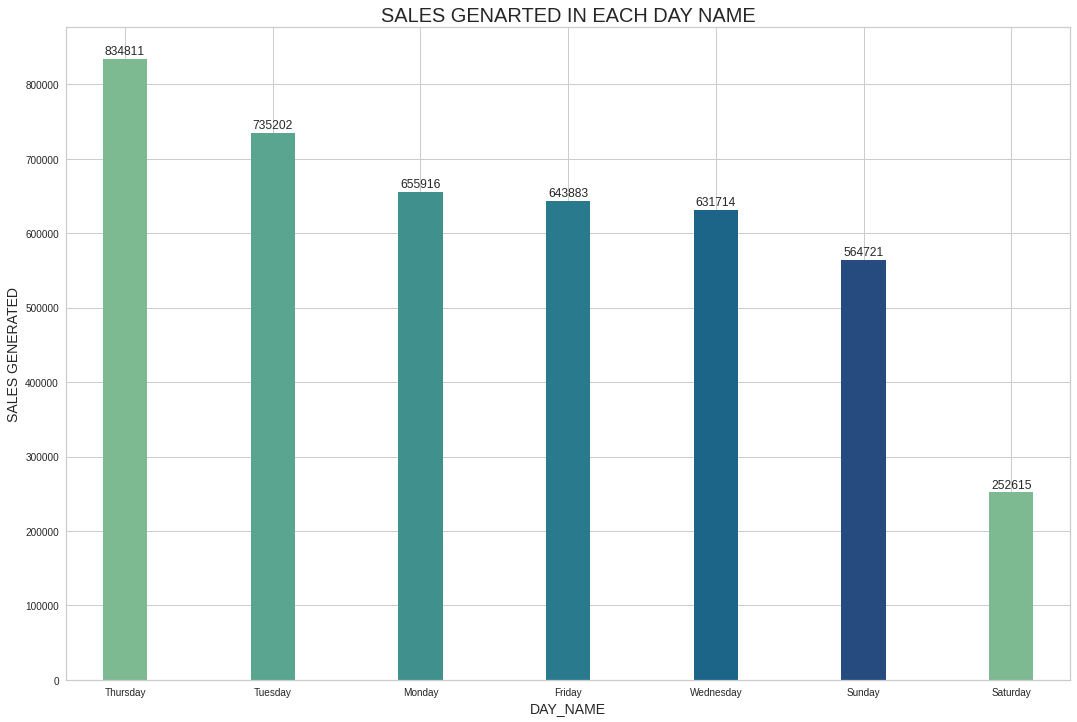

In [ ]:
#sales generated in each day name
high_sales_time_slots=data.groupby('day_name')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,12))
ax = high_sales_time_slots.plot(kind = 'bar', rot=0, color=sns.color_palette('crest'), width=0.3)
ax.set_title('SALES GENARTED IN EACH DAY NAME', y=1, fontsize=20)
ax.set_xlabel('DAY_NAME',fontsize=14)
ax.set_ylabel('SALES GENERATED', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()




1. From the above bar plot we can clearly seen that when theweek day is Thuursday , Tuesday and Monday most number of customer prefers to bought items beacause of that most number of sales are generated in those 3 days.

2. company needs to apply some startegies to generate more and more revenue in these days.

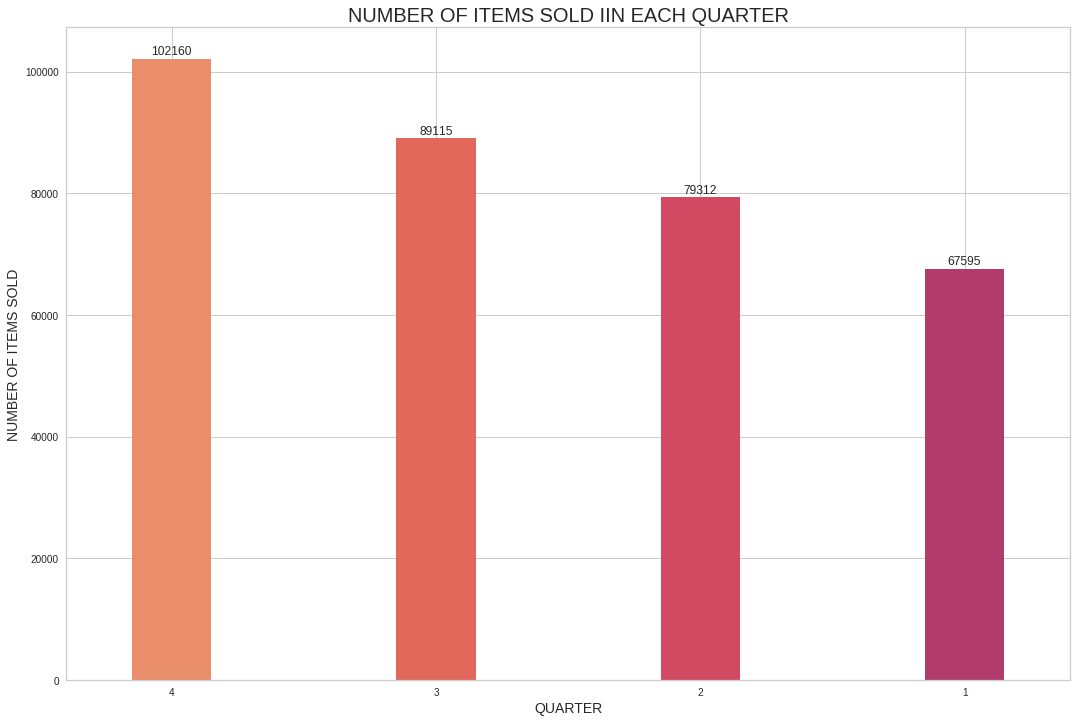

In [ ]:
#barplot number of item sold in each QUARTER 
Quarter = data['Quarter'].value_counts()
plt.figure(figsize=(18,12))
ax = Quarter.plot(kind = 'bar', rot=0, color=sns.color_palette('flare'), width=0.3)
ax.set_title('NUMBER OF ITEMS SOLD IIN EACH QUARTER', y=1, fontsize=20)
ax.set_xlabel('QUARTER',fontsize=14)
ax.set_ylabel('NUMBER OF ITEMS SOLD', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

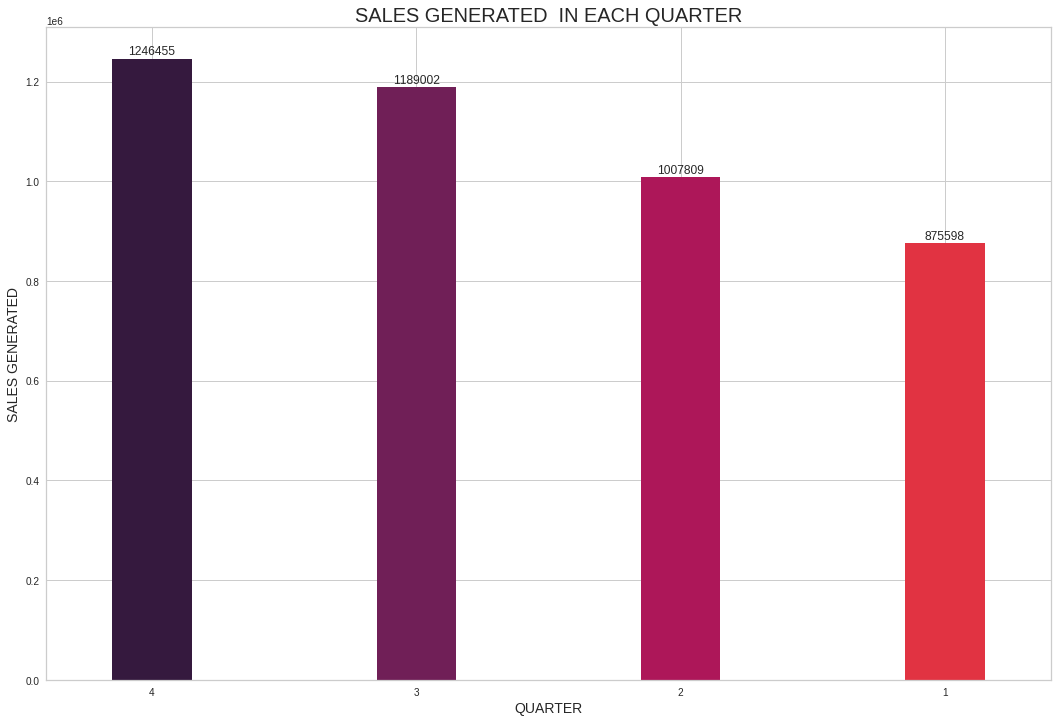

In [ ]:
#barplot number of sales generated in each column
high_sales_quarter=data.groupby('Quarter')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,12))
ax = high_sales_quarter.plot(kind = 'bar', rot=0, color=sns.color_palette('rocket'), width=0.3)
ax.set_title('SALES GENERATED  IN EACH QUARTER', y=1, fontsize=20)
ax.set_xlabel('QUARTER',fontsize=14)
ax.set_ylabel('SALES GENERATED', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

from the above bar plot we can see that as the quarter increases customer prefers to bought more   items.


At the end of the year most number of product has been bought by the customers.


But company generate high sales in quarter 3 soo we can estimate that most of the distributor and retailers bought items in huge quatity in the quarter 3 to supply the items to their customer for quarter 4.


From the above statement we can conclude that company recuire to maintain supply in quarter 3 beacause most of the retailers and distributor bought items in quarter 3.



Quarter 3 have to be very important for company to made profit in whole year.

### Co-rrelation

Text(0.5, 1.0, 'CORRELTAION MATRIX')

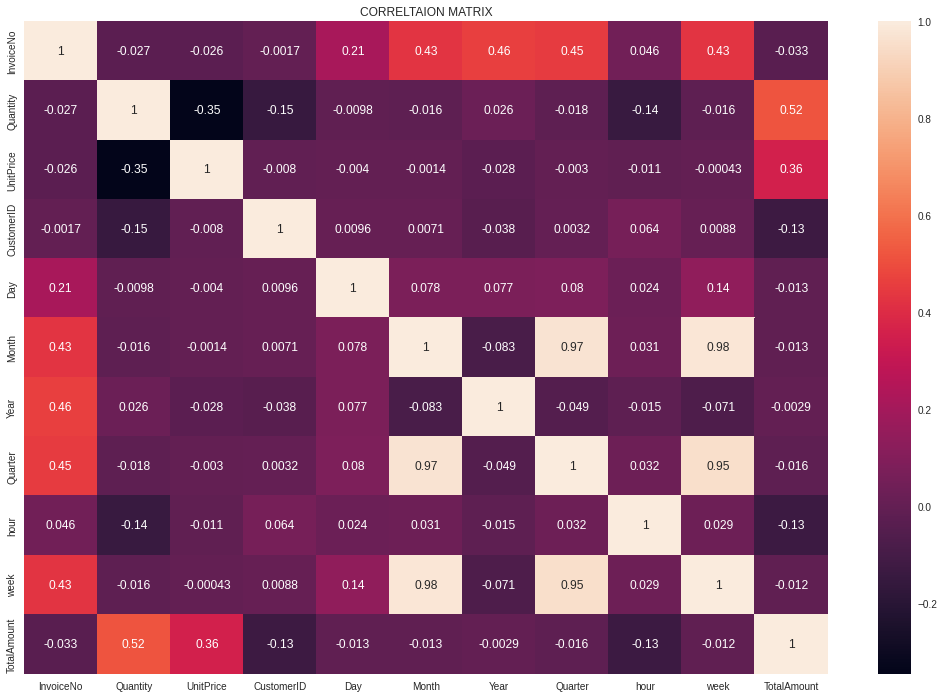

In [ ]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

From the above co-relation plot we can see that most of the features are  highly co-relation but we require only few features to cluster our customers.

so we can ignore this co-relation

### CUSTOMER SEGMENTATION USING RFM MODELING

## Recency

In [ ]:
# Most recent date in the dataset
last_invoice_date = max(data['InvoiceDate'])

In [ ]:
last_invoice_date

Timestamp('2011-12-10 17:19:00')

In [ ]:
import datetime as dt
latest_Date = dt.datetime(2011,12,11)

In [ ]:
# Creating a dataframe to find the most recent purchase
recency_df = pd.DataFrame(data.groupby('CustomerID').max()['InvoiceDate'], columns = ['InvoiceDate'])
recency_df.reset_index(inplace = True)

# Calculating days from most recent purchase
recency_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_Date - x).days)
recency_df = recency_df.loc[: , ['CustomerID', 'Recency']]
recency_df.head()


,CustomerID,Recency
0,12347,40
1,12348,220
2,12349,19
3,12350,311
4,12352,73


## FREQUENCY

In [ ]:
# Creating a frequency dataframe
freq_df = pd.DataFrame(data = data.groupby('CustomerID').nunique()['InvoiceNo'])
freq_df.reset_index(inplace = True)
freq_df.columns = ['CustomerID', 'Frequency']
freq_df.head()

,CustomerID,Frequency
0,12347,7
1,12348,3
2,12349,1
3,12350,1
4,12352,7


## MONETORY

In [ ]:
# Grouping by customer ID to find total billed amount per customer
monetary_df = pd.DataFrame(data.groupby('CustomerID').sum()['TotalAmount'])
monetary_df.reset_index(inplace = True)
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12347,3314.73
1,12348,90.20
2,12349,999.15
3,12350,294.40
4,12352,1130.94


## CREATING NEW DATAFRAME BY MERGING ALL THESE THREE FEATURES

In [ ]:
# Merging 3 dataframes to form an RFM dataframe
rec_fre = recency_df.merge(freq_df, on = 'CustomerID' )
rfm_df = rec_fre.merge(monetary_df, on = 'CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,40,7,3314.73
1,12348,220,3,90.20
2,12349,19,1,999.15
3,12350,311,1,294.40
4,12352,73,7,1130.94


In [ ]:
# Information of the RFM dataframe
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4192 non-null   int64  
 1   Recency     4192 non-null   int64  
 2   Frequency   4192 non-null   int64  
 3   Monetary    4192 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 163.8 KB


## SPLITING CUSTOMERS IN FOUR SEGMENTS USING QUANTILES

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles =quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 13808.75, 0.5: 15280.5, 0.75: 16770.25},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary': {0.25: 207.85000000000002,
  0.5: 468.66499999999996,
  0.75: 1136.625},
 'Recency': {0.25: 22.0, 0.5: 61.0, 0.75: 162.0}}

## CREATING FUNCTION TO CATEGORISE CUSTOMERS

In [ ]:
#Functions to create R , F ,M segments
def RScoring(x,p,d):
    if x <= d[p][0.25] :
         return 1
    elif x <= d[p][0.50] :
        return 2
    elif x <= d[p][0.75] :
        return 3
    else :
        return 4
def FnMScoring(x,p,d):
    if x <= d[p][0.25] :
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1                                

## Extracting new variables from recency , freaquency and monetory

In [ ]:
rfm_df['R']=rfm_df['Recency'].apply(RScoring , args = ('Recency',quantiles,))
rfm_df['F']=rfm_df['Frequency'].apply(FnMScoring , args = ('Frequency',quantiles,))
rfm_df['M']=rfm_df['Monetary'].apply(FnMScoring , args = ('Monetary',quantiles,))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12347,40,7,3314.73,2,1,1
1,12348,220,3,90.20,4,2,4
2,12349,19,1,999.15,1,4,2
3,12350,311,1,294.40,4,4,3
4,12352,73,7,1130.94,3,1,2


## Creating new features by adding  R , F , M categories

In [ ]:
#Calculate and Add RPMGroup value column showing combined concatenated score of RPM
rfm_df['RFMGroup']=rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore']=rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12347,40,7,3314.73,2,1,1,211,4
1,12348,220,3,90.20,4,2,4,424,10
2,12349,19,1,999.15,1,4,2,142,7
3,12350,311,1,294.40,4,4,3,443,11
4,12352,73,7,1130.94,3,1,2,312,6


In [ ]:
#statistical description of dataset.
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,15290.259065,105.616651,4.015983,1030.263007,2.487834,2.660782,2.500000,7.648616
std,1719.353408,114.120616,7.022919,2205.355349,1.121510,1.192880,1.118167,2.911787
min,12347.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,13808.750000,22.000000,1.000000,207.850000,1.000000,2.000000,1.750000,5.000000
50%,15280.500000,61.000000,2.000000,468.665000,2.000000,3.000000,2.500000,8.000000
75%,16770.250000,162.000000,4.000000,1136.625000,3.000000,4.000000,3.250000,10.000000
max,18287.000000,697.000000,197.000000,85018.780000,4.000000,4.000000,4.000000,12.000000


## Conclusion

From the above RFM customer segmentation we can cluster customers into 3 categories according to there RFM score. we can build customers segmentation into gold,platinum and diamond class.





## Diamond Class

The customers which have a RFM score greater than equal to 10 and till the end(in these scenario maximum RFM score is 12) those customers are belog to Diamond Category.

Those customers are the most important customers for the company with respect to sales.

Company should target those customers to sell expensive iteams and aware that customers when company launches new products.

Also company requires to develop marketing campeign add target these customer at first priority.

Those customers and more likely distributors who distribute there products in all the area in there limit so company require to offer these categories of customer a huge discounts when they buy items in huge quantity.

## Platinum class

The customers which have a RFM score greater than equal to 8 and less than equal to 10 those customers are belog to platinum  Category.

Those customer are second most important customers to generate sales for the company.

Company should target those customers to expensive products and midium expensive products.

also company should maintain good relationship with these costomers category stay in contact with these customers regularly.

There is a possibility that these customers are retailers who boughts a items in huge amount sp these customer categories are important categories to generate sales for the company.

## Gold Class

The customers which have a RFM score less than 8 all these customer are belong to category  gold class.

Most number of customer are belong to these class .

These are the regular customers of company but these customers are not bought items in huge frequency.

Company dont need to target these customer for expensive product.

Also when company launch a marketing campaign. No need to target these customer at the level of Diamond and Platinum class customers.



## Applying Clustering Algorithems to segment customers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


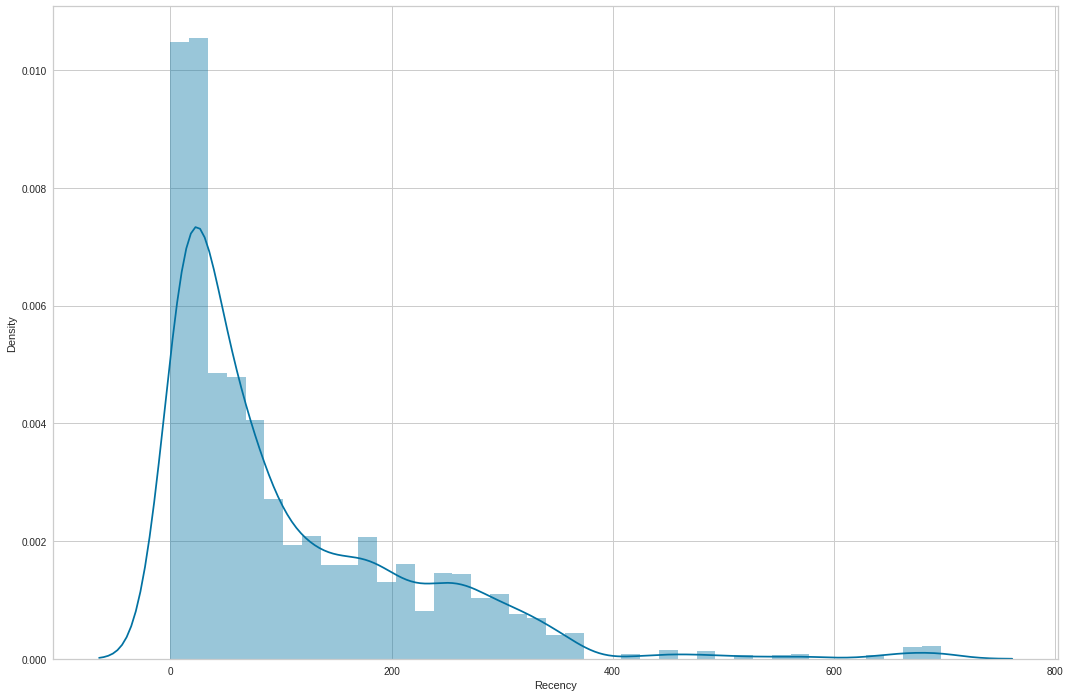

In [ ]:
plt.figure(figsize=(18,12))
sns.distplot(rfm_df['Recency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


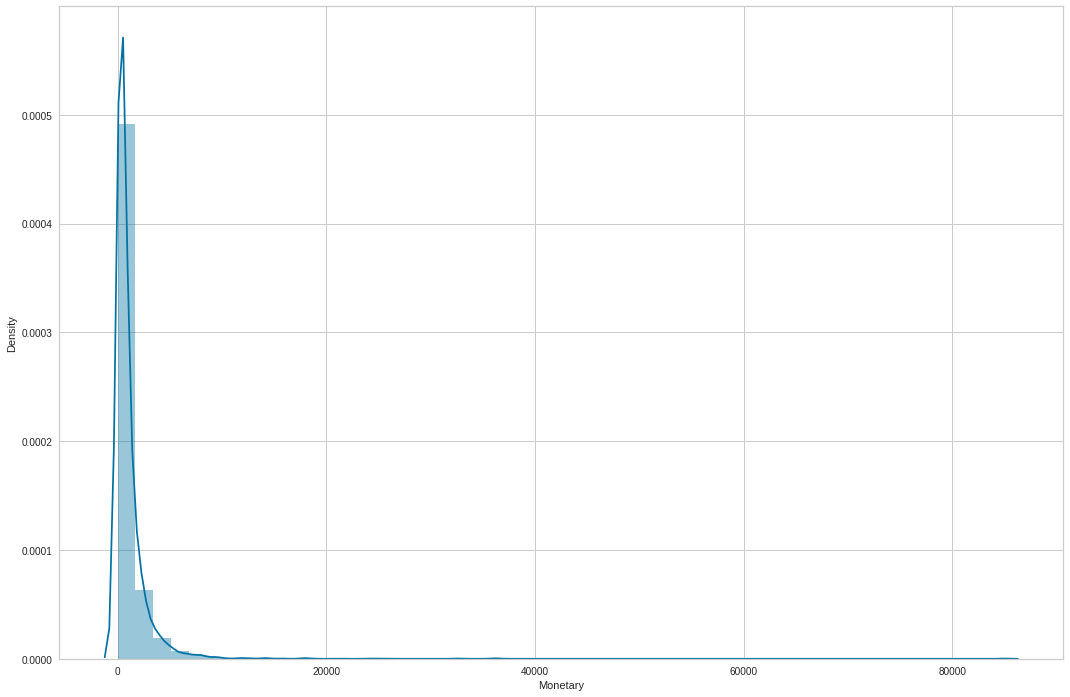

In [ ]:
plt.figure(figsize=(18,12))
sns.distplot(rfm_df['Monetary'])

From the above distribution plot we can see that distribution of Recency and Monetory is Negatively skewed for that we have to apply log transformation to staderdize those distribution.

# Creating function to handle zero and negative values to avoid infinite numbers during log tranformation

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


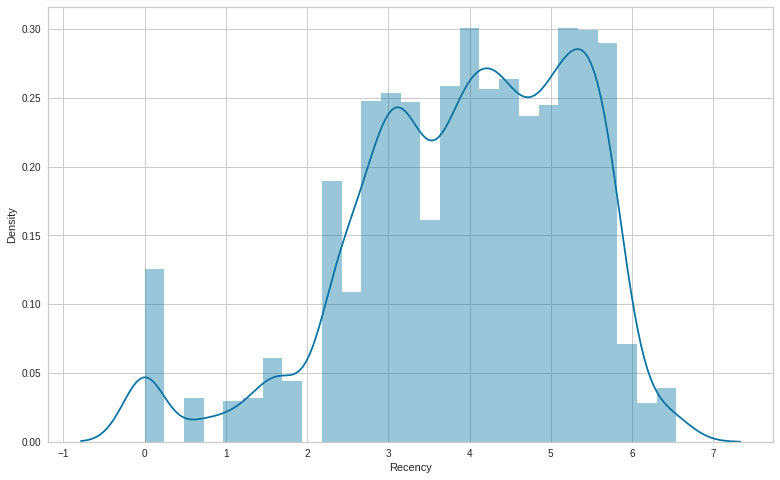

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


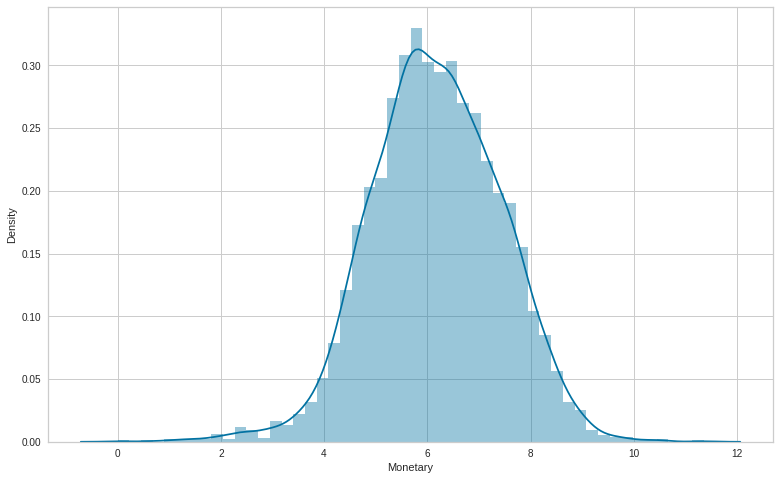

In [ ]:
plt.figure(figsize=(13,8))
Monetory_plot=Log_Tfd_Data['Monetary']
sns.distplot(Monetory_plot)

Now by applying log transformation we can somehow say that recency and monetory are normaly distriuted.

In [ ]:
# Making the customer ID the index of the dataframe
rfm_df.set_index('CustomerID', inplace= True)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347,40,7,3314.73,2,1,1,211,4
12348,220,3,90.20,4,2,4,424,10
12349,19,1,999.15,1,4,2,142,7
12350,311,1,294.40,4,4,3,443,11
12352,73,7,1130.94,3,1,2,312,6


In [ ]:
# Statistical Description of the RFM dataset
rfm_df.describe()

,Recency,Frequency,Monetary,R,F,M,RFMScore
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,105.633349,4.015983,1030.263245,2.487834,2.660782,2.500000,7.648616
std,114.105229,7.022919,2205.355237,1.121510,1.192880,1.118167,2.911787
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,22.000000,1.000000,207.850000,1.000000,2.000000,1.750000,5.000000
50%,61.000000,2.000000,468.665000,2.000000,3.000000,2.500000,8.000000
75%,162.000000,4.000000,1136.625000,3.000000,4.000000,3.250000,10.000000
max,697.000000,197.000000,85018.780000,4.000000,4.000000,4.000000,12.000000


## Applying stadard scaler

In [ ]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler, Normalizer
rfm_df_1=rfm_df[['Recency','Frequency','Monetary']]



['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFMGroup', 'RFMScore']

In [ ]:
# Scaling the dataframe
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df)
scaled_data = normal.fit_transform(scaled_data)
rfm_scaled = pd.DataFrame(scaled_data,columns=[ 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFMGroup', 'RFMScore'])
rfm_scaled.set_index(rfm_df.index, inplace=True)
rfm_scaled.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347,-0.211503,0.156236,0.380893,-0.159943,-0.511933,-0.493266,-0.206202,-0.460750
12348,0.371368,-0.053602,-0.157939,0.499582,-0.205245,0.497044,0.453852,0.299209
12349,-0.328898,-0.186034,-0.006112,-0.574689,0.486336,-0.193707,-0.493515,-0.096496
12350,0.567613,-0.135438,-0.105232,0.425230,0.354065,0.141023,0.436541,0.362988
12352,-0.164745,0.244760,0.026297,0.263066,-0.801997,-0.257585,0.164721,-0.326150


In [ ]:
#extracting recency , frequency and monetory column
rfm_scaled=rfm_scaled[['Recency','Frequency','Monetary']]
# First 5 rows of the scaled data
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,-0.211503,0.156236,0.380893
12348,0.371368,-0.053602,-0.157939
12349,-0.328898,-0.186034,-0.006112
12350,0.567613,-0.135438,-0.105232
12352,-0.164745,0.244760,0.026297


## VISUALIZING RELATION BETWEEN RECENCY , FREQUENCY AND MONETORY IN 3D AXIS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


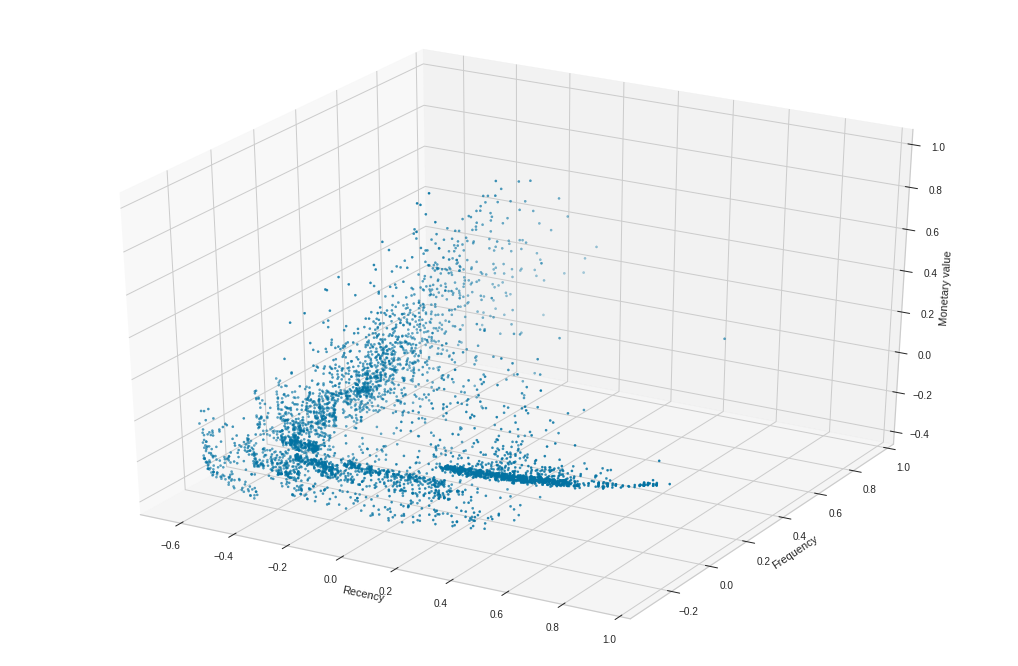

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(18,12))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_scaled['Recency']
ys=rfm_scaled['Frequency']
zs=rfm_scaled['Monetary']
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

from the above 3D visualization we can see that there ana some anomaly present in dataset we need to remove those anamolies to cluster customers perfectly for that we arw applying anamoly detection technique.

## K-Means Clustering

## Applying elbow method to identify number of clusters.

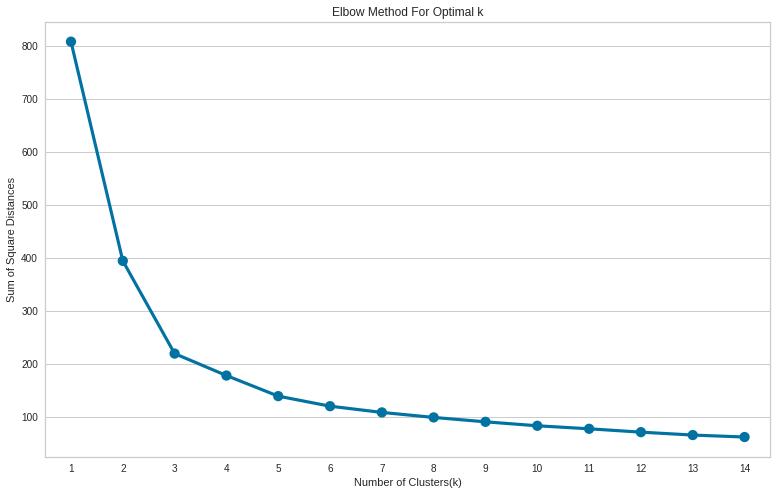

In [ ]:
from sklearn.cluster import KMeans

plt.figure(figsize=(13,8))
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(rfm_scaled)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the above elbow curve we can see that if the number of clusters is 2 then we get lower within cluster sum of sqaured of error but also when the number of cluster is 3 then we can say that wcss value will flatten.

soo we are applying both number of cluster and see the results.

## K-means with 3 clusters

By applyint k-means and number of clusters 3 the cluster formation have done very well by kmeans.

Now we have to clarify is 3 clusters are perfects for these dataset for taht we are apllylying silhouette score.


## Silhouette Analysis

In [ ]:
# Creating a function for silhouette plot visualization
def sil_visual(input, k):
  ''' Visualize the silhouette plot with different clusters'''

  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

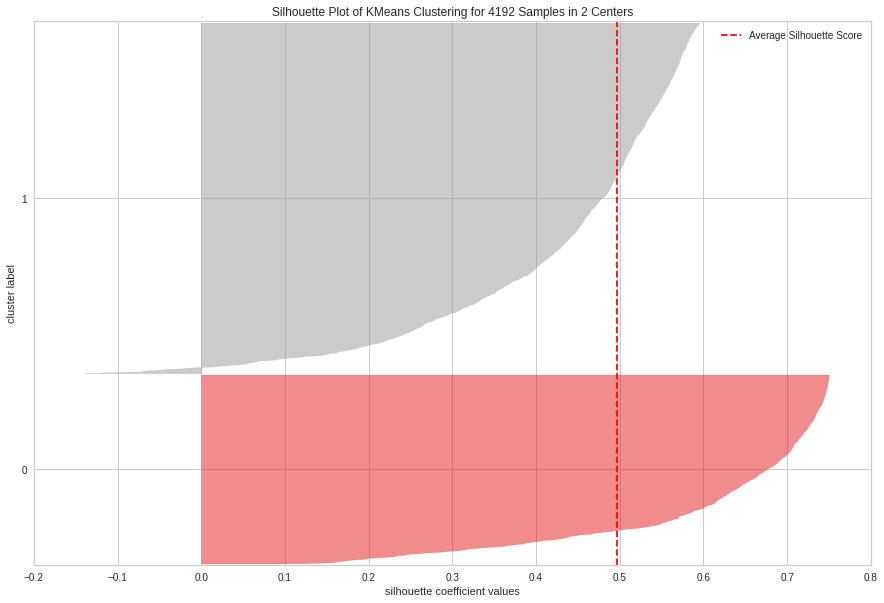

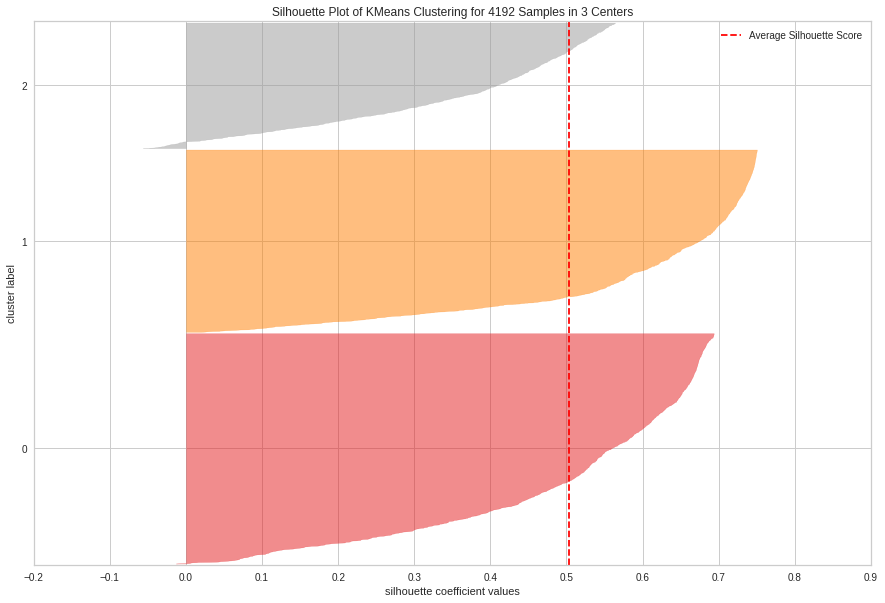

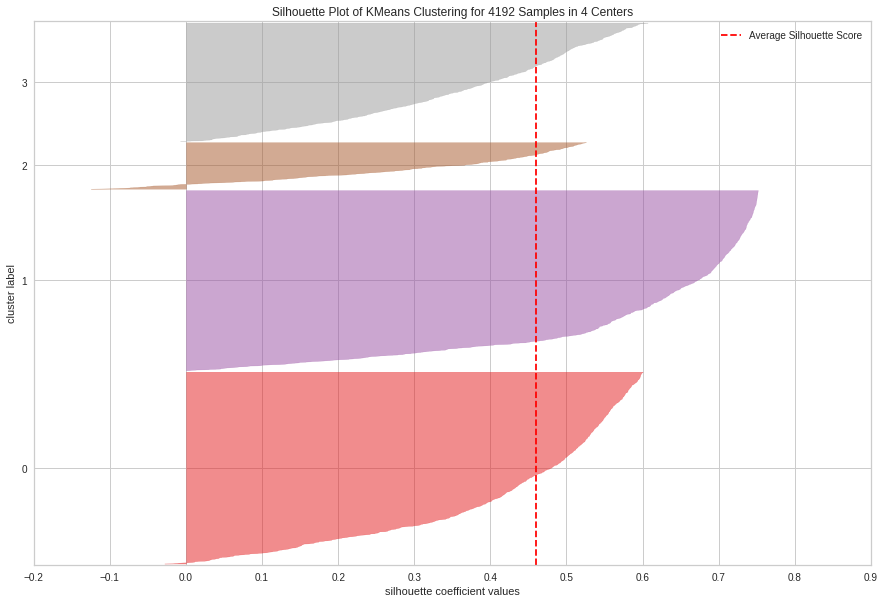

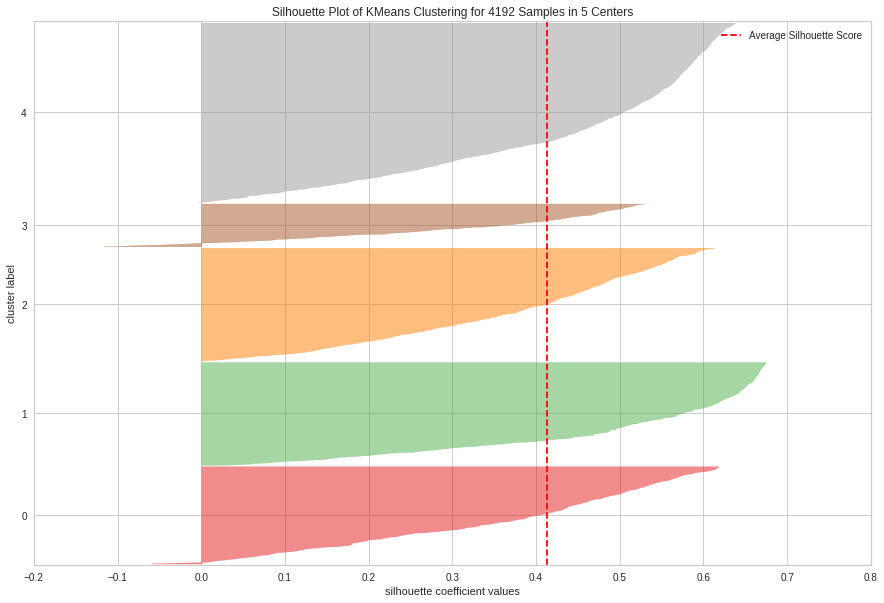

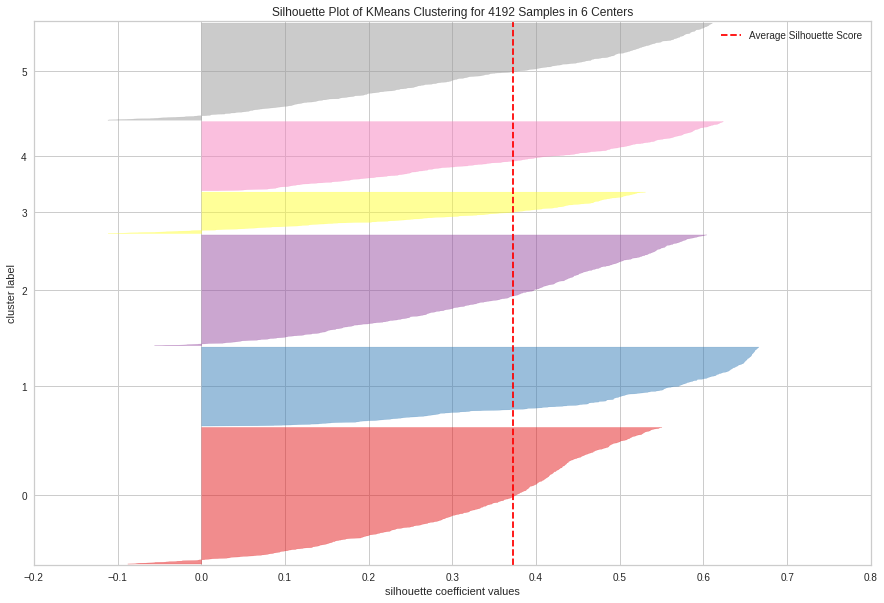

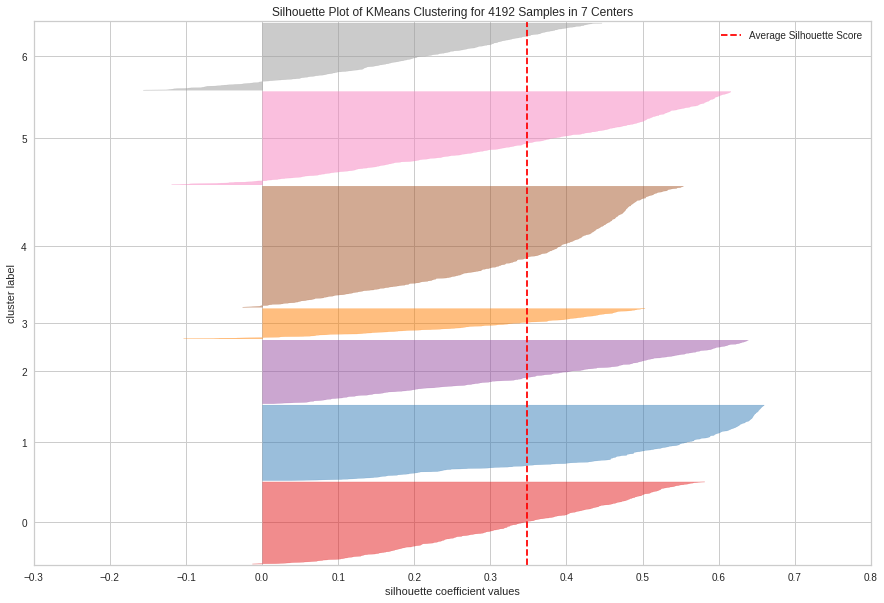

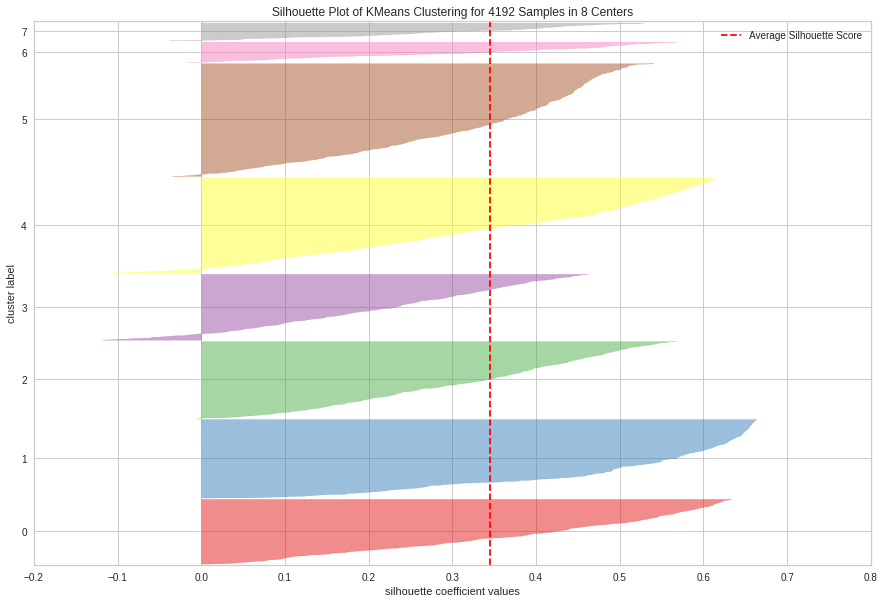

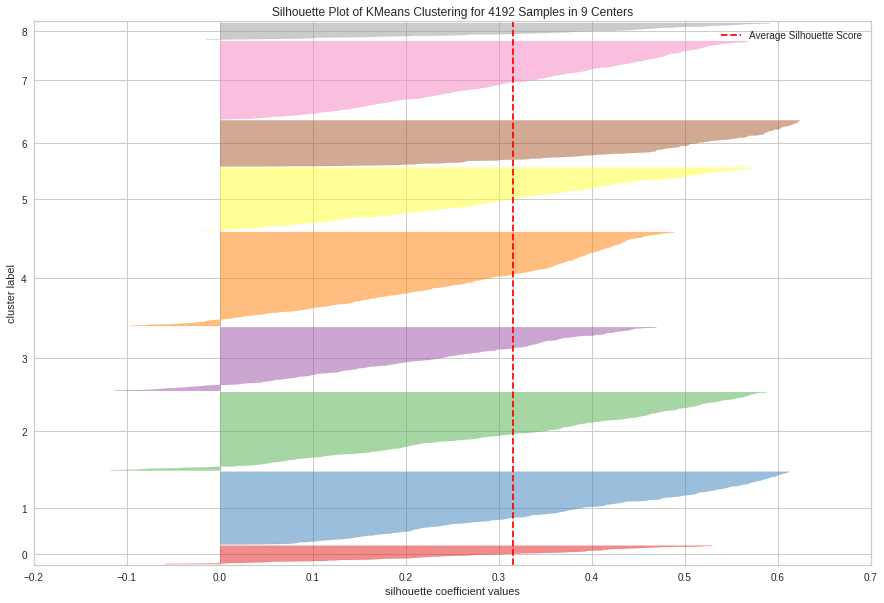

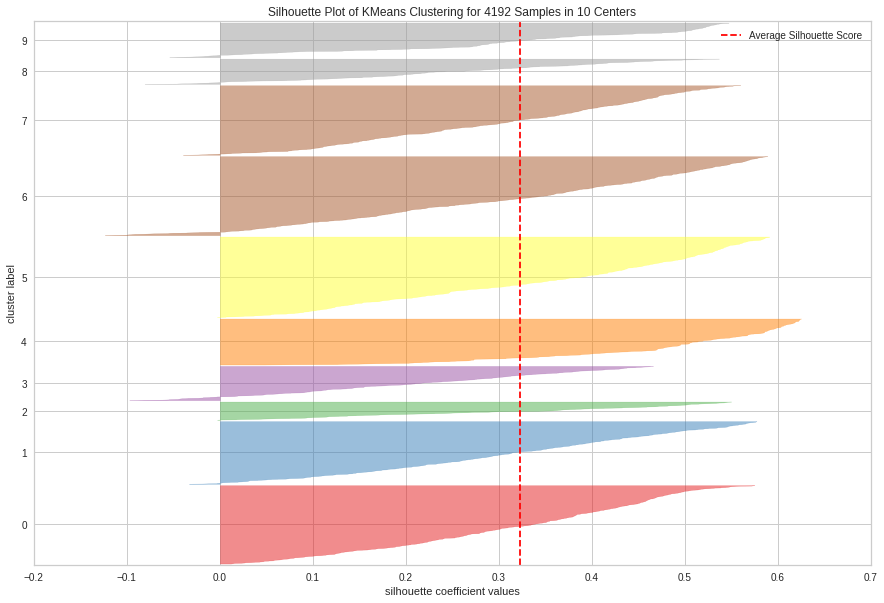

In [ ]:
# Applying the silhouette visualization function for different clusters.
sil_visual(rfm_scaled, 10)

 Silhouette score is 0.52 when we form 3 number of cluster it is better as compared to all number of cluster values.

## Dendogram

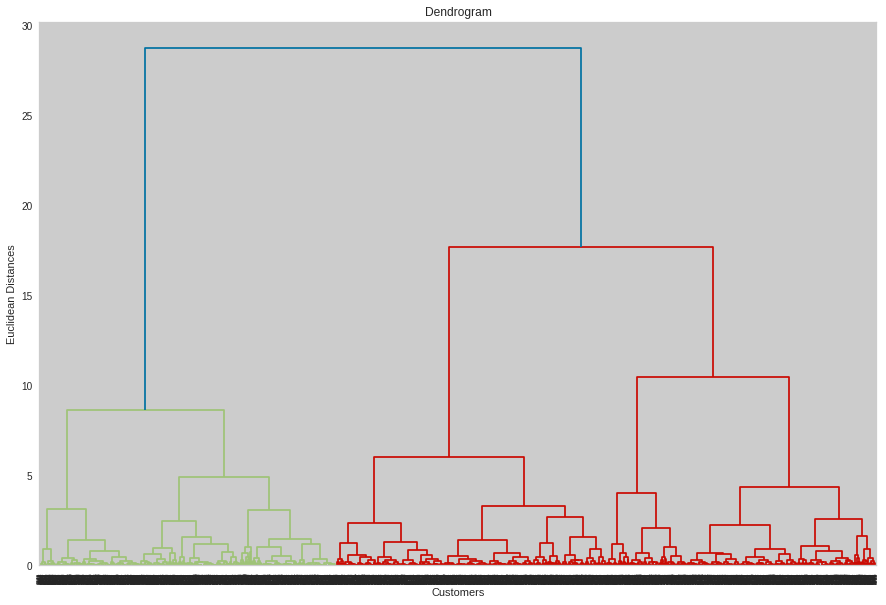

In [ ]:
#plotting dendogram to estimate number of clusters
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

By applying dendogram we can also visualize that 3 clustors and suitable for these dataset.

## Now predictions of the clusters can be made, these predictions can be represented as a column in the RFM dataframe, which can help in profiling the clusters

## Applying K_means clustering

In [ ]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=10)
# Fitting the model to the data
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=10)

In [ ]:
labels = kmeans.predict(rfm_scaled)
rfm_df_1['Cluster'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rfm_df_1.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,40,7,3314.73,2
12348,220,3,90.20,0
12349,19,1,999.15,1
12350,311,1,294.40,0
12352,73,7,1130.94,2


# Cluster Profilling

In [ ]:
# Grouping by clusters to understand the profiles
rfm_df_1.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,234.659155,1.661268,364.716945
1,43.076923,2.338350,492.434555
2,33.046012,10.512270,2983.167556


In [ ]:
# Number of customers belonging to each cluster
rfm_df_1['Cluster'].value_counts()

1    1794
0    1420
2     978
Name: Cluster, dtype: int64

# By grouping RFM dataframe on the basis of clusters, and using K-mean to summarize the variables we understand that :-

##  Diamond Customers - Cluster 2

These are the most valuable customers for the company.These customers are very Recent also bought
items very frequently and these customers  bought items in a mass valume.

So company need to maitain good relationship with these customers they have to offer discounts and better deals to that customer so that company able to generate more sales from that customer.

This customers are more likely to be wholesellers or distributors.

Also when company develop any marketing campaign these customers should be the first priority of the company.

## Platinum Customers - Cluster 1

These customers segment is more recent after diamond cluster also they bought more items in in bulk valume .

These customer are second most important customer for company after diamond customers.

Also company have to bilt strategy to convert these customers into Diamond Customers.

##  Gold Customers -  Cluster 0

These customers are not reguar customers of company also these customers does not bought items very frequently and they do not bought items in bulk valume.

So company give less priority to this customers.

Also company built strategy to convert these customer in Platinum customers.

## Principal component analysis

In [ ]:
#fit RFM data into PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(rfm_scaled)

PCA(n_components=2)

In [ ]:
#tranforn data into 2 dimentions
X_pca = pca.transform(rfm_scaled)


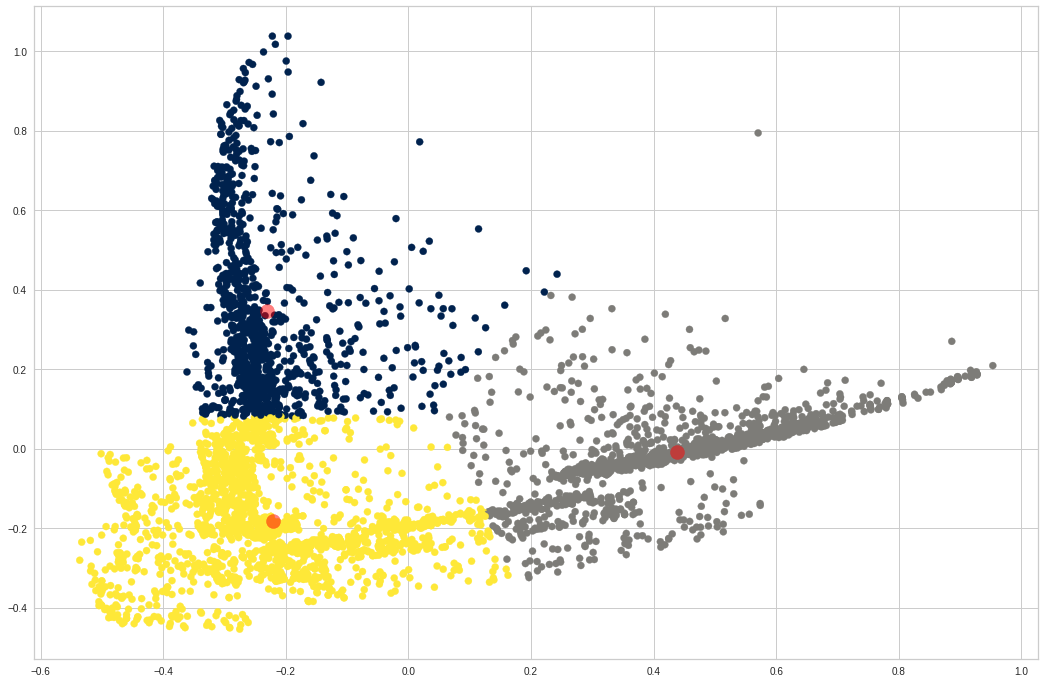

In [ ]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=0)
# Fitting the model to the data
kmeans.fit(X_pca)
# Creating cluster labels for the data and appending it to the RFM dataframe
plt.figure(figsize=(18,12))
labels = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
            s=50, cmap='cividis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

By visualizing K_means cluster we can clearly seen that it performs very well job.

the clustor centrods are at long distance and there are are some outlier but it is not affection to form cluster in that case. 

## Conclusion

We appliend customer segmentation by using two technique firstly we group customers into three segment using RFM score by these we can get mmost valuable person and prioterise them accordind to there RFM score. This technique is very helpful for marketing cmpaign and also to traget customers for some of the specific products.



After that we have choosen k_means clastering divide clusteres into three segments
K_means clusters works very well in these scenario it does noy affected by the outliers and also it forms clusters in very appropiate way . Also we use some techniques to estimate the perfect number of clusters by using elbow Method,dendogram and silhouit score.

Also we use Pricipal component analysis to reduce the dimention of the dataset in order to visualise how k_means buildt clusters by visualising these we can conclude that k_means algorithems form a clusters according to the recency , frequency and monetory attributes of the customer it futher divinde it into three group and we label these group as Diamond , Platinum and gold.




Diamond class customers are most valuble customers for the store to target and to offers deals in order to generate more sales from the customer.
This type are customers are typically Wholeseller,distributors.






Platinum  customers are less valuable that duamond customers . stores management should build srategies for how they convert platinum customers into diamond class customers.





Gold customers are least valuable customers for the store management than Diamond and Platinum class customers.

